## Plot Benchmark Results
Plot benchmark results for Read and Interactions benchmarks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r = pd.read_csv('../results/Read.csv')[['cores','read_total']]
i = pd.read_csv('../results/Interactions.csv')[['cores','interactions_total']]

In [3]:
data = i.merge(r, on='cores')
data = data.sort_values('cores')
data = data.rename(index=str, columns={"read_total": "read", "interactions_total": "interactions"})

In [4]:
n_cores = data.cores.max()
print("Max number of cores:", n_cores)

Max number of cores: 20


In [5]:
df = data.copy()
df

,cores,interactions,read
2,1,1938.772298,705.542397
4,2,982.553516,359.398714
5,4,487.702928,194.265181
6,8,275.552368,110.722824
0,12,194.696970,81.069290
1,16,162.272867,71.603906
3,20,156.883388,68.958939


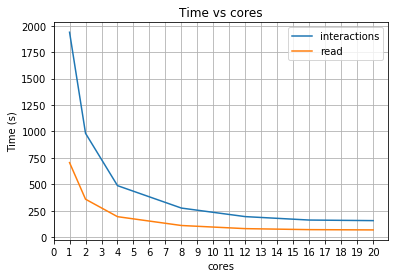

In [6]:
df.plot.line(x="cores", grid=True, title="Time vs cores")

plt.ylabel('Time (s)')
plt.xticks(np.arange(0, n_cores+1, 1))
plt.savefig('../results/TimeVsCores.png')
plt.show()

## Calculate Speedup

In [7]:
df['read'] = df.read.max()/df.read
df['interactions'] = df.interactions.max()/df.interactions
df

,cores,interactions,read
2,1,1.000000,1.000000
4,2,1.973198,1.963119
5,4,3.975314,3.631852
6,8,7.035949,6.372150
0,12,9.957897,8.702955
1,16,11.947606,9.853407
3,20,12.358047,10.231341


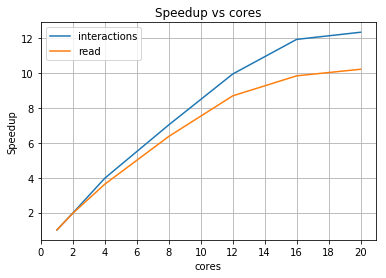

In [8]:
df.plot.line(x="cores", grid=True, title="Speedup vs cores")

plt.ylabel('Speedup')
plt.xticks(np.arange(0, n_cores+1, 2))
plt.savefig('../results/SpeedupVsCores.png')
plt.show()

## Calculate the Netto Speedup
Here we subtract the time required to read the data to see how the calculations scale with the number of cores.

In [9]:
df = data.copy()
df['interactions_netto'] = df['interactions'] - df['read']
df

,cores,interactions,read,interactions_netto
2,1,1938.772298,705.542397,1233.229901
4,2,982.553516,359.398714,623.154802
5,4,487.702928,194.265181,293.437746
6,8,275.552368,110.722824,164.829545
0,12,194.696970,81.069290,113.627680
1,16,162.272867,71.603906,90.668961
3,20,156.883388,68.958939,87.924448


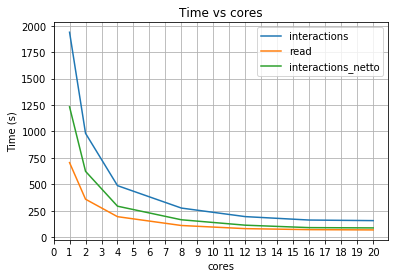

In [10]:
df.plot.line(x="cores", grid=True, title="Time vs cores")

plt.ylabel('Time (s)')
plt.xticks(np.arange(0, n_cores+1, 1))
plt.savefig('../results/TimeNettoVsCores.png')
plt.show()

In [11]:
df['read'] = df.read.max()/df.read
df['interactions'] = df.interactions.max()/df.interactions
df['interactions_netto'] = df.interactions_netto.max()/df.interactions_netto

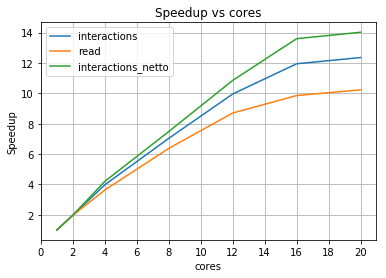

In [12]:
df.plot.line(x="cores", grid=True, title="Speedup vs cores")

plt.ylabel('Speedup')
plt.xticks(np.arange(0, n_cores+1, 2))
plt.savefig('../results/SpeedupNettoVsCores.png')
plt.show()